In [1]:
state = 'NM' 
year = 2020
objective_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of NM has 3 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from NM_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 149 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method
from pareto import filter_and_sort_pareto
from metrics import scores

plans_dict = {}
for obj_type in objective_types:
    
    print(f"\n{'#' * 100}")
    print(f"Applying epsilon-constraint method for {state} with compactness objective {obj_type}")
    print(f"{'#' * 100}\n")
    
    plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
    _,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
    print(f"Passing {len(nondominated_warm_starts_plans)} nondominated warm start plans")
    
    (new_plans, obj_bounds, deviations) = epsilon_constraint_method(
                G,                 
                obj_type,          
                contiguity ='lcut',                                             # {'lcut', 'scf', 'shir'} 
                cutoff=None,       
                verbose=True,
                warm_start_mode ='user',                                        # {'None', 'user', 'refinement'}
                warm_starts=warm_starts,                     # if you have user define warm starts else it is None
                starting_deviation=starting_deviation, 
                time_limit=7200, 
                sizes=None,      
                max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
                symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
                state=state,
                year=year
            )
    plans_dict[(state, obj_type)] = list(zip(new_plans, obj_bounds, deviations))
    warm_starts += new_plans


####################################################################################################
Applying epsilon-constraint method for NM with compactness objective cut_edges
####################################################################################################

Passing 5 nondominated warm start plans
Initially, L = 698783 and U = 712899 and k = 3.

****************************************
Trying deviation = 7058.406666666667
****************************************
Using user-provided warm starts.
Selected warm_start = [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]]
Objective value: 17
Deviation: 5433.333333333372

****************************************
Running labeling model!
****************************************
L = 698783 and U = 712899 and k = 3
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
s

     0     2   13.62324    0  207   18.00000   13.62324  24.3%     -    1s

Cutting planes:
  Gomory: 6
  Cover: 10
  Implied bound: 2
  Zero half: 4
  RLT: 14
  Relax-and-lift: 1
  BQP: 2

Explored 21 nodes (1892 simplex iterations) in 1.48 seconds (0.14 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 18 

Optimal solution found (tolerance 1.00e-07)
Best objective 1.800000000000e+01, best bound 1.800000000000e+01, gap 0.0000%

User-callback calls 550, time in user-callback 0.01 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]]

****************************************
Trying deviation = 3735.1666666667056
****************************************
Using user-provided warm starts.
Selected warm_start = [[13, 25], [2, 5, 7, 8, 11, 15, 19, 21, 23, 


Solution count 1: 20 

Optimal solution found (tolerance 1.00e-07)
Best objective 2.000000000000e+01, best bound 2.000000000000e+01, gap 0.0000%

User-callback calls 839, time in user-callback 0.09 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]]

****************************************
Trying deviation = 1510.4999999999611
****************************************
Using user-provided warm starts.
Selected warm_start = [[13, 18, 25], [2, 5, 7, 8, 11, 15, 21, 24, 29, 30, 31], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 19, 20, 22, 23, 26, 27, 28, 32]]
Objective value: 21
Deviation: 1354.3333333333721

****************************************
Running labeling model!
****************************************
L = 704331 and U = 707351 and k = 3
sizes =  [1, 1, 1]
Solving the max B pr

Selected warm_start = [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]]
Objective value: 47.033937593126964
Deviation: 5433.333333333372

****************************************
Running labeling model!
****************************************
L = 698783 and U = 712899 and k = 3
sizes =  [1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
Feasib

Selected warm_start = [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]]
Objective value: 50.18372373556686
Deviation: 3208.666666666628

****************************************
Running labeling model!
****************************************
L = 702106 and U = 709575 and k = 3
sizes =  [1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
Feasibi

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 1314 rows, 1119 columns and 4261 nonzeros
Model fingerprint: 0x49532b23
Variable types: 297 continuous, 822 integer (822 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+05]
  Objective range  [4e-02, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 1320 rows, 1128 columns and 4888 nonzeros
Model fingerprint: 0x4945caf0
Model has 3 quadratic constraints
Variable types: 306 continuous, 822 integer (822 binary)
Coefficient statistics:
  Matrix range     [3e-02, 7e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]

User MIP start produced solution with

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 1320 rows, 1128 columns and 4888 nonzeros
Model fingerprint: 0x45f550b2
Model has 3 quadratic constraints
Variable types: 306 continuous, 822 integer (822 binary)
Coefficient statistics:
  Matrix range     [3e-02, 7e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]

Set parameter LazyConstraints to value 1
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 1320 rows, 1128 columns and 4888 nonzeros
Model fingerprint: 0xcd507cb0
Model has 3 quadratic constraints
Variable types: 306 continuous, 822 integer (822 binary)
Coefficient statistics:
  Matrix range     [3e-02, 7e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [3e-01, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 849 rows and 580 columns
Presolve time: 0.


Solution count 3: 0.43342 0.408721 0.367054 
No other solutions better than 0.43342

Optimal solution found (tolerance 1.00e-07)
Best objective 4.334198633830e-01, best bound 4.334198633830e-01, gap 0.0000%

User-callback calls 9558, time in user-callback 0.16 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]]

****************************************
Trying deviation = 5433.166666666705
****************************************
Using user-provided warm starts.
Selected warm_start = [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]]
Objective value: 0.42576644748134873
Deviation: 3208.666666666628

****************************************
Running labeling model!
**************************************

   717   346    0.77307    9  261    0.41550    0.92092   122%  72.5    5s
   729   354    0.81091   12  273    0.41550    0.81091  95.2%  71.3   10s
  1508   229    0.47029   30   45    0.41550    0.53433  28.6%  68.0   15s

Cutting planes:
  Gomory: 15
  Cover: 3
  Implied bound: 1
  MIR: 9
  Flow cover: 42
  Inf proof: 6
  Zero half: 16
  RLT: 40

Explored 3435 nodes (224564 simplex iterations) in 18.32 seconds (3.56 work units)
Thread count was 20 (of 20 available processors)

Solution count 3: 0.415501 0.390128 0.348461 
No other solutions better than 0.415501

Optimal solution found (tolerance 1.00e-07)
Best objective 4.155009589855e-01, best bound 4.155009589855e-01, gap 0.0000%

User-callback calls 8409, time in user-callback 0.13 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 

     0     0    0.81549    0  176          -    0.81549      -     -    0s
     0     0    0.81317    0  182          -    0.81317      -     -    0s
     0     0    0.80463    0  178          -    0.80463      -     -    1s
     0     0    0.80335    0  181          -    0.80335      -     -    1s
     0     0    0.80230    0  182          -    0.80230      -     -    1s
     0     0    0.80199    0  186          -    0.80199      -     -    1s
     0     0    0.80190    0  199          -    0.80190      -     -    1s
     0     0    0.80190    0  199          -    0.80190      -     -    1s
     0     0    0.80148    0  199          -    0.80148      -     -    1s
     0     0    0.80143    0  206          -    0.80143      -     -    2s
     0     0    0.80101    0  193          -    0.80101      -     -    2s
     0     0    0.80098    0  205          -    0.80098      -     -    2s
     0     0    0.80086    0  216          -    0.80086      -     -    2s
     0     0    0.80079  

Presolved model has 3 quadratic constraint(s)
Variable types: 10 continuous, 546 integer (546 binary)

Root relaxation: objective 5.902197e-01, 312 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.59022    0   43    3.50663    0.59022  83.2%     -    0s
     0     0    1.57388    0   81    3.50663    1.57388  55.1%     -    0s
     0     0    2.57203    0   71    3.50663    2.57203  26.7%     -    0s
     0     0    2.58674    0   75    3.50663    2.58674  26.2%     -    0s
     0     0    2.58676    0  104    3.50663    2.58676  26.2%     -    0s
     0     0    2.58676    0   80    3.50663    2.58676  26.2%     -    0s
     0     0    2.58676    0   54    3.50663    2.58676  26.2%     -    0s
     0     0    2.58676    0   21    3.50663    2.58676  26.2%     -    0s
     0     0    2.58676    0   24    3.50663    2.58676  

No feasible solution was found within the region: [0, 1354.3]

####################################################################################################
Pareto Frontier for state NM,  objective cut_edges
####################################################################################################

Pareto front plans: [[[13, 18, 25], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 19, 20, 22, 23, 26, 27, 28, 32], [2, 5, 7, 8, 11, 15, 21, 24, 29, 30, 31]], [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 25], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 18, 20, 22, 26, 28, 29, 32], [2, 5, 7, 8, 11, 15, 19, 21, 23, 24, 27, 30, 31]], [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]]]
Pareto front

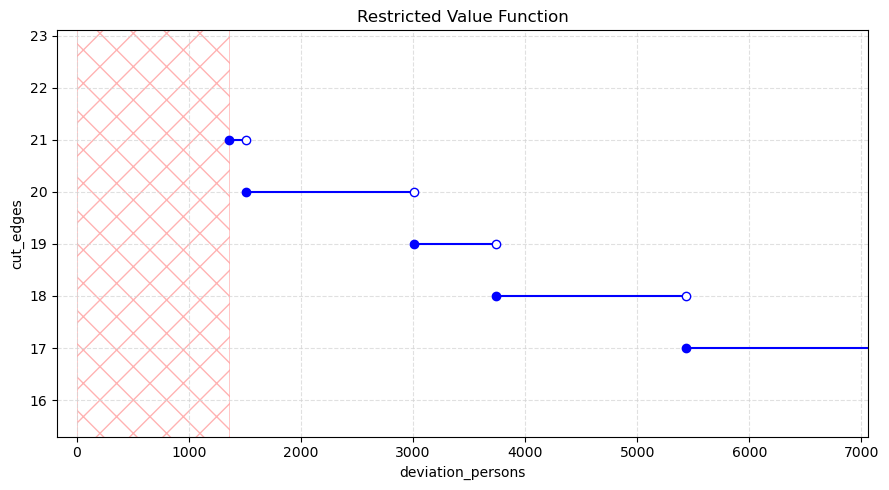

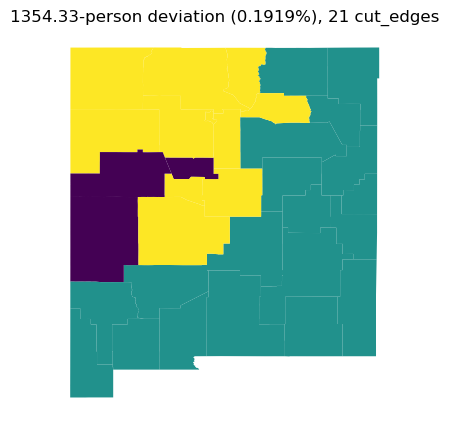

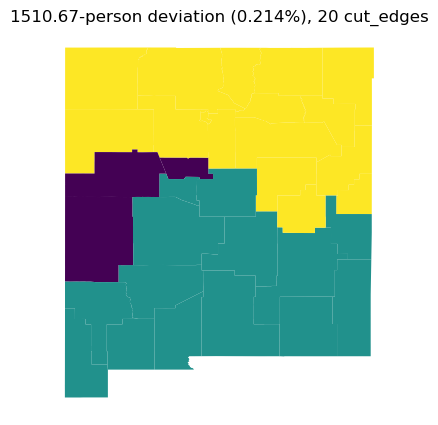

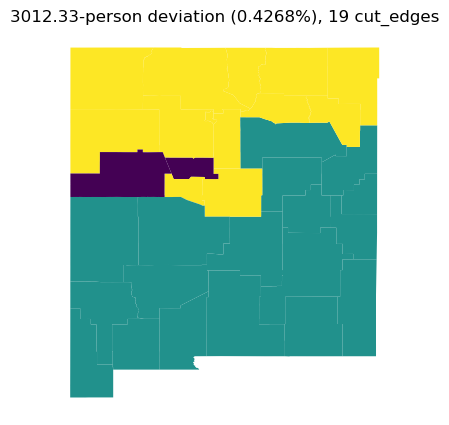

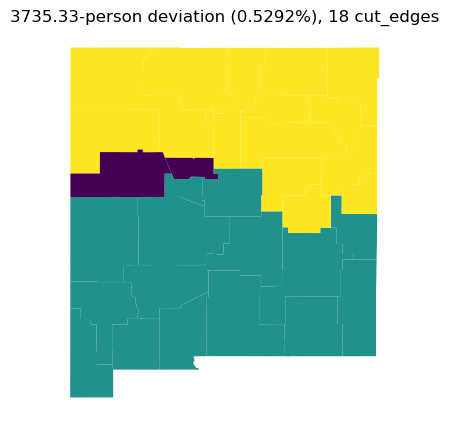

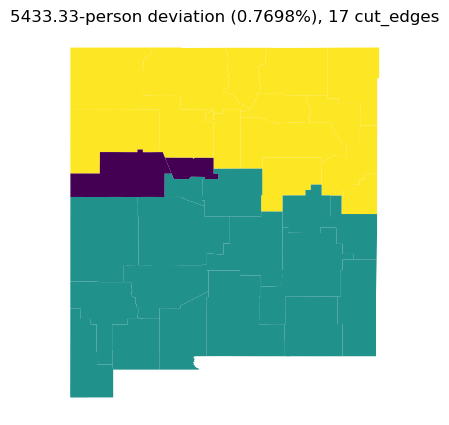

No feasible solution was found within the region: [0, 1354.3]

####################################################################################################
Pareto Frontier for state NM,  objective perimeter
####################################################################################################

Pareto front plans: [[[13, 18, 25], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 20, 22, 26, 28, 29, 32], [2, 5, 7, 8, 11, 15, 19, 21, 23, 24, 27, 30, 31]], [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]]]
Pareto front

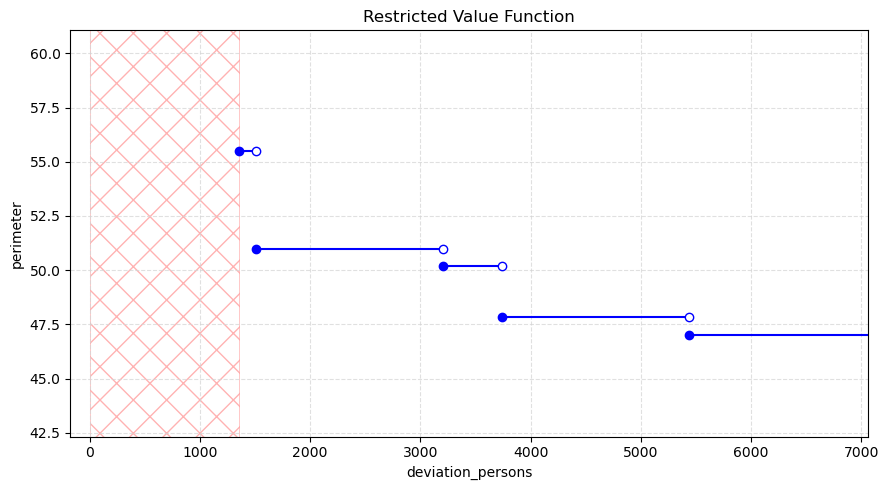

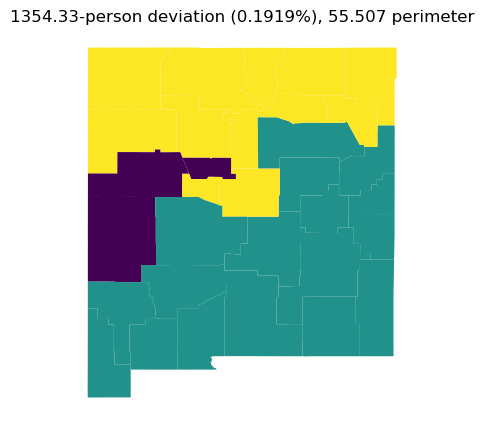

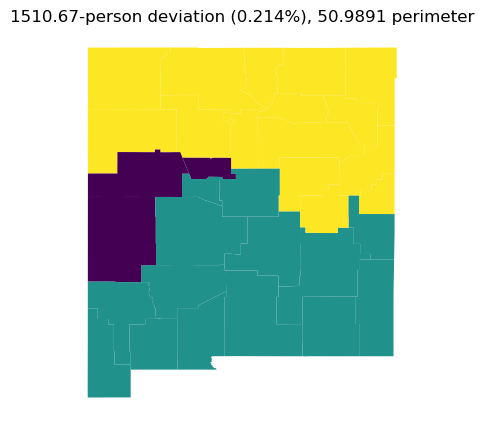

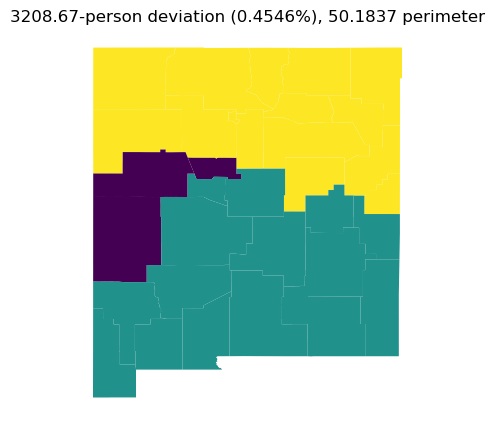

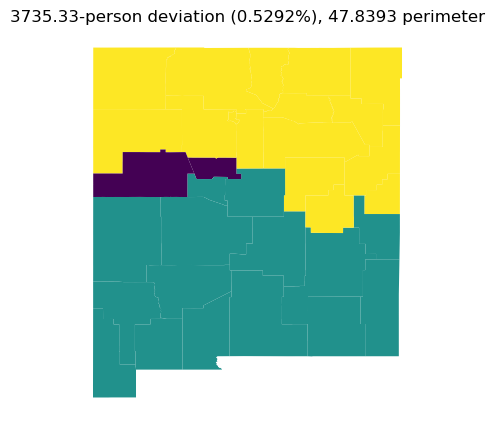

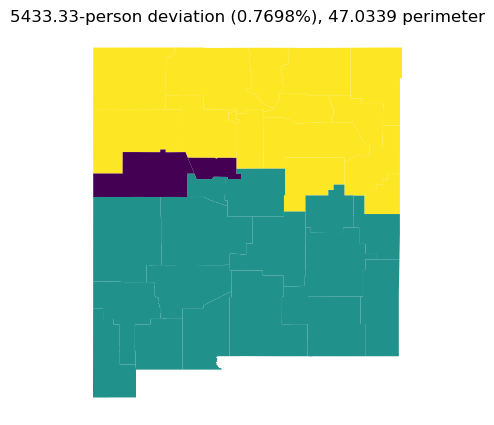

No feasible solution was found within the region: [0, 1354.3]

####################################################################################################
Pareto Frontier for state NM,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[13, 18, 25], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 20, 22, 26, 28, 29, 32], [2, 5, 7, 8, 11, 15, 19, 21, 23, 24, 27, 30, 31]], [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]]]
Pareto front upper bounds: [[1354.3333333333721, 2.8674776231990404], [1510.6666666666279, 2.41654859137618], [3208.666666666628, 

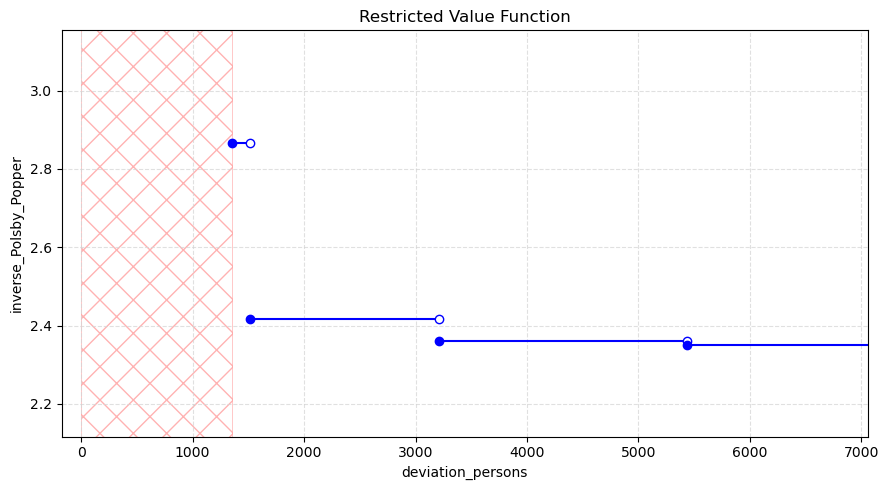

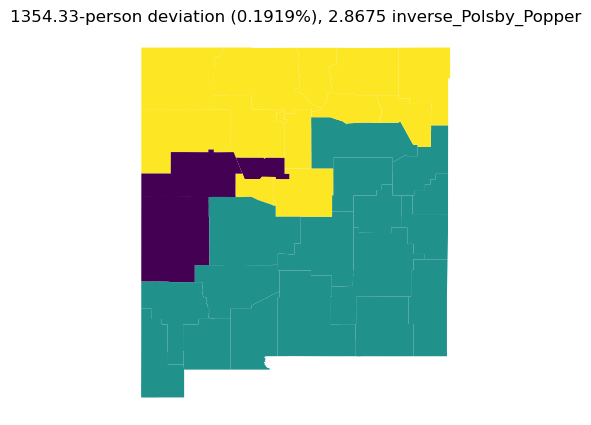

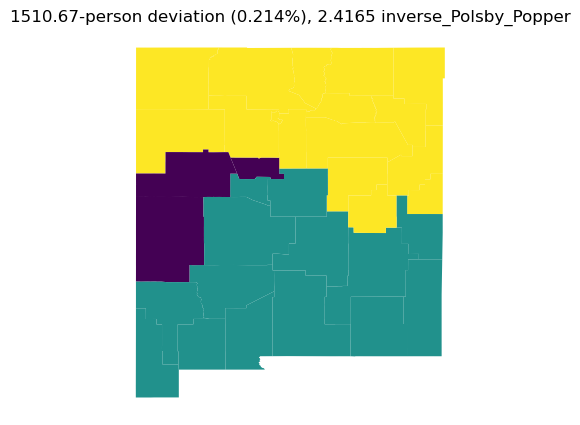

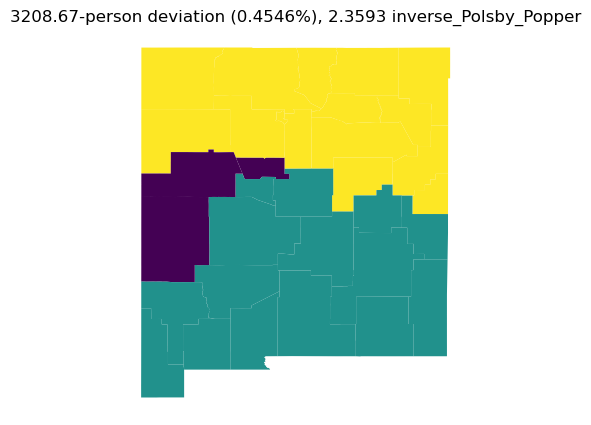

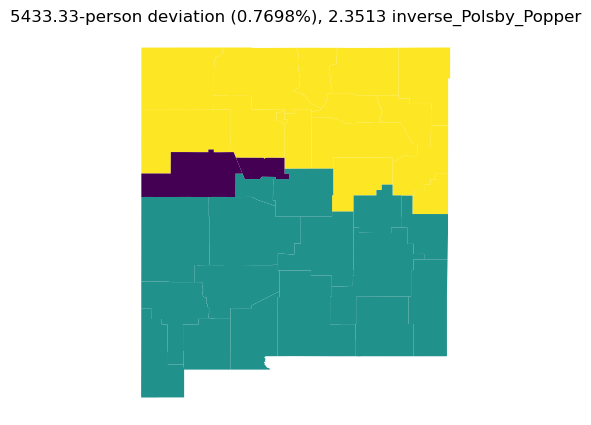

No feasible solution was found within the region: [0, 1354.3]

####################################################################################################
Pareto Frontier for state NM,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[13, 18, 25], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 20, 22, 26, 28, 29, 32], [2, 5, 7, 8, 11, 15, 19, 21, 23, 24, 27, 30, 31]], [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 25], [1, 3, 5, 6, 9, 10, 14, 15, 16, 17, 18, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 19, 20, 21, 23, 24, 27, 30, 31]]]
Pareto front upper bounds: [[1354.3333333333721, 0.35677146911621094], [1510.6666666666279, 0.4155009589855069], [3208.66666666662

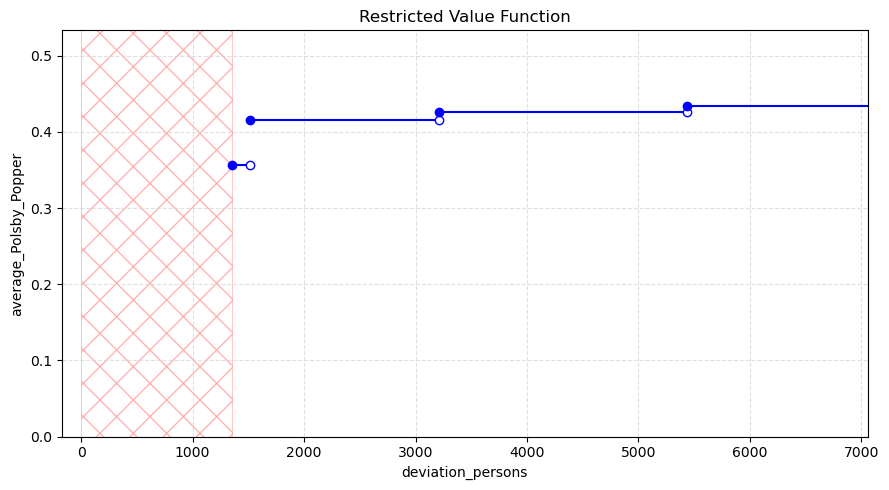

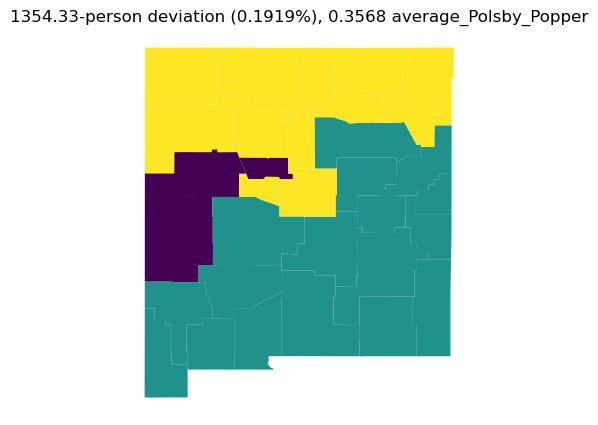

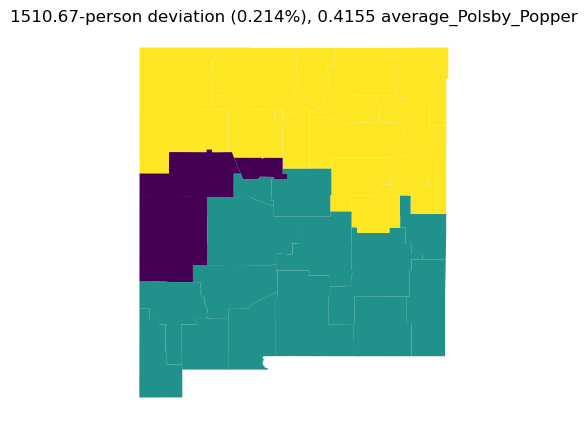

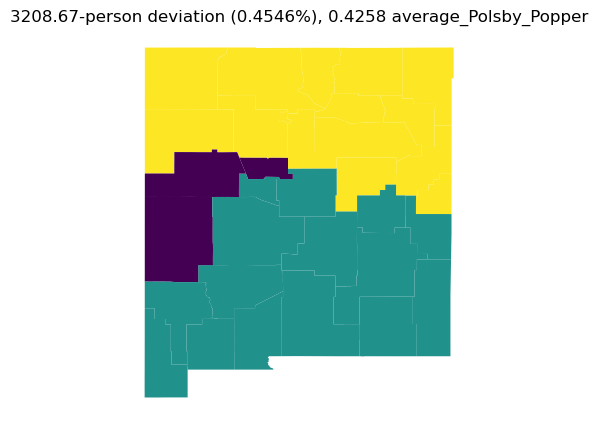

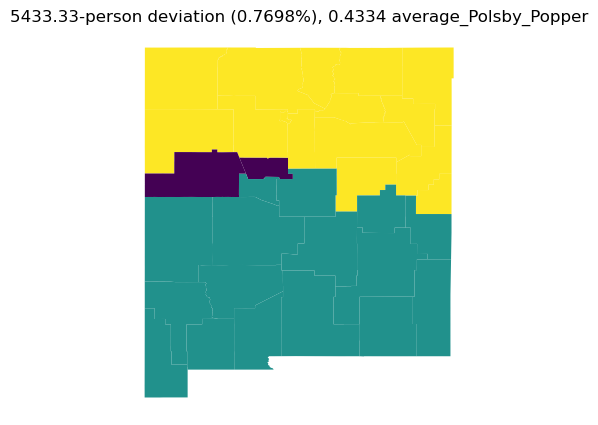

No feasible solution was found within the region: [0, 1354.3]

####################################################################################################
Pareto Frontier for state NM,  objective bottleneck_Polsby_Popper
####################################################################################################

Pareto front plans: [[[13, 18, 25], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 20, 22, 26, 28, 29, 32], [2, 5, 7, 8, 11, 15, 19, 21, 23, 24, 27, 30, 31]], [[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]]]
Pareto front upper bounds: [[1354.3333333333721, 0.2851744307921699], [1510.6666666666279, 0.3865841595621306]]
Pareto front lower bounds: [[1354.3333333333721, 0.2851744307921699], [1510.6666666666279, 0.3865841595621306]]


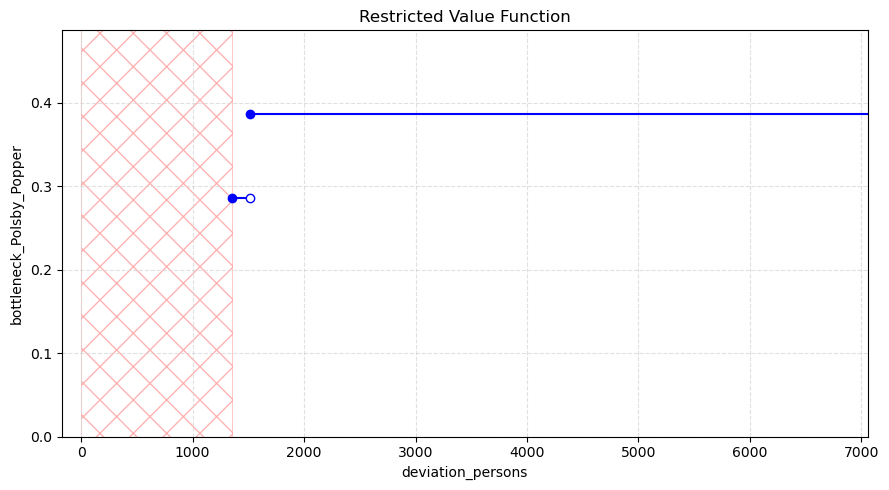

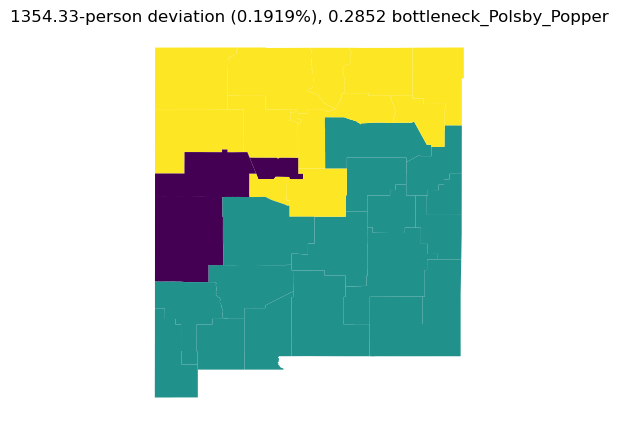

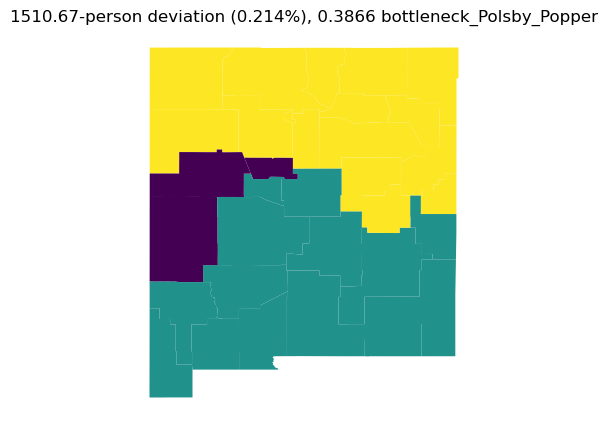

In [7]:
from pareto import plot_pareto_frontiers

epsilon = 1 / (2 * G._k)
for (state, obj_type), result in plans_dict.items():
    
    min_deviation = min(round(r[2], 1) for r in result)
    if min_deviation < epsilon:
        no_solution_region = None
    else:
        no_solution_region = [0, min_deviation]
        print(f"No feasible solution was found within the region: {no_solution_region}")
        
    plot_pareto_frontiers(
                    G,
                    method='epsilon_constraint_method',
                    plans=None,                                   #if method ='epsilon_constraint_method' is None 
                    obj_types=obj_type,                               
                    ideal_population=G._ideal_population,
                    state=state,
                    filepath=filepath,
                    filename2=filename2,
                    no_solution_region=no_solution_region,
                    year=year,
                    result=result                               #if method ='heuristic' is None 
                 )